## Observations and Insights 

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.drop_duplicates()
study_results.drop_duplicates()

mouse_metadata.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
merge_df=pd.merge(mouse_metadata,study_results, on= "Mouse ID" )

# Display the data table for preview
merge_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
# Checking the number of mice.
unique_mouse=merge_df["Mouse ID"].unique()
len(unique_mouse)

249

In [5]:
count_mouse=pd.DataFrame(merge_df["Mouse ID"].value_counts())

In [6]:
mouse_time=merge_df[["Mouse ID","Timepoint"]]
mouse_time.head()
mouse_time_group=mouse_time.groupby(['Timepoint'])
mouse_time_group.count().head(10)


,Mouse ID
Timepoint,
0,250
5,238
10,223
15,207
20,195
25,183
30,171
35,154
40,142


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_time=mouse_time.loc[mouse_time["Timepoint"]==0,:]
duplicate=duplicate_time[duplicate_time.duplicated()]
duplicate

,Mouse ID,Timepoint
909,g989,0


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_time1=merge_df.loc[merge_df["Mouse ID"]=='g989' ,:]
duplicate_time1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_final=merge_df.loc[(merge_df["Mouse ID"] !='g989')]
data_final.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice in the clean DataFrame.
len(data_final["Mouse ID"].unique())

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

descriptive_analysis1=data_final.groupby(["Drug Regimen"])
drug_mean=descriptive_analysis1["Tumor Volume (mm3)"].mean()

drug_median=descriptive_analysis1["Tumor Volume (mm3)"].median()

drug_std=descriptive_analysis1["Tumor Volume (mm3)"].std()

drug_sem=descriptive_analysis1["Tumor Volume (mm3)"].sem()

summary=pd.DataFrame({"Mean":drug_mean,
                      "Median":drug_median,
                      "Standard Deviation":drug_std,
                      "SEM":drug_sem})
summary.head()

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

descriptive_analysis1.agg({
    "Tumor Volume (mm3)":['mean','median','std','sem']

                            })                                           

Tumor Volume (mm3)                               
                           mean     median       std       sem
Drug Regimen                                                  
Capomulin             40.675741  41.557809  4.994774  0.329346
Ceftamin              52.591172  51.776157  6.268188  0.469821
Infubinol             52.884795  51.820584  6.567243  0.492236
Ketapril              55.235638  53.698743  8.279709  0.603860
Naftisol              54.331565  52.509285  8.134708  0.596466
Placebo               54.033581  52.288934  7.821003  0.581331
Propriva              52.320930  50.446266  6.622085  0.544332
Ramicane              40.216745  40.673236  4.846308  0.320955
Stelasyn              54.233149  52.431737  7.710419  0.573111
Zoniferol             53.236507  51.818479  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Measurements by Drug Regimen')

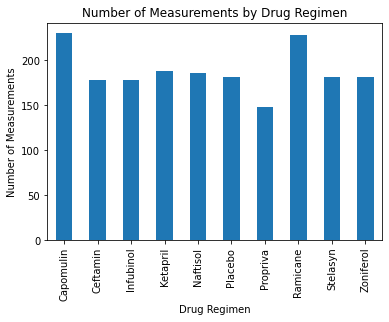

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

total_measurement=descriptive_analysis1['Drug Regimen'].count()
measurement_chart=total_measurement.plot(kind='bar')
measurement_chart.set_ylabel("Number of Measurements")
measurement_chart.set_title("Number of Measurements by Drug Regimen")

Text(0.5, 1.0, 'Number of Measurements by Drug Regimen')

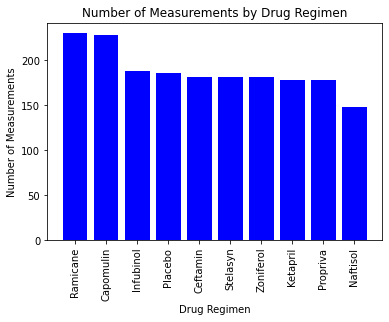

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
import numpy as np
drug_regimen=data_final["Drug Regimen"].unique()
x_axis=np.arange(len(drug_regimen))
count_measurement=data_final['Drug Regimen'].value_counts()

plt.bar(x_axis,count_measurement,color="b",align="center")
tick_drugs=[value for value in x_axis]
plt.xticks(tick_drugs,drug_regimen)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.title("Number of Measurements by Drug Regimen")

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_groups=data_final.groupby(['Sex'])
count_gender=gender_groups["Sex"].count()
count_gender

Sex
Female    922
Male      958
Name: Sex, dtype: int64

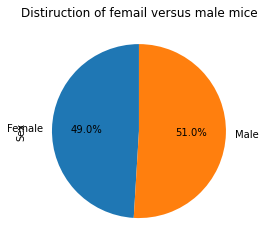

In [17]:
gender_pie=count_gender.plot(kind="pie",y='gender',autopct="%1.1f%%",startangle=90,title="Distiruction of femail versus male mice")

plt.show()


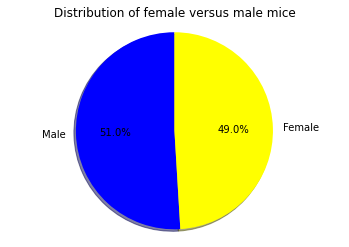

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_desit=data_final["Sex"].unique()
count_measurement=data_final['Sex'].value_counts()
colors=["blue","yellow"]


plt.title("Distribution of female versus male mice")
plt.pie(count_measurement,labels=sex_desit,colors=colors,autopct="%1.1f%%",shadow=True, startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint=data_final.groupby('Mouse ID')["Timepoint"].max()
max_timepoint_df=pd.DataFrame(max_timepoint.reset_index())
max_timepoint_df

merge_df_max=pd.merge(data_final,max_timepoint_df,on="Mouse ID")
merge_df2=merge_df_max.rename(columns={'Timepoint_y':'Max_Timepoint'})
merge_df2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Max_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
drug_select=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_final=[]
for drug in drug_select:
    temp_df=merge_df2.loc[merge_df2['Drug Regimen']==drug]
    
    final_volumn=temp_df.loc[temp_df['Timepoint_x']==temp_df['Max_Timepoint']]
    
    tumor_value=final_volumn["Tumor Volume (mm3)"]
    
    tumor_final.append(tumor_value)
    
    
    tumor_quartile=tumor_value.quantile([0.25,.5,0.75])
    lowerq=tumor_quartile[0.25]
    upperq=tumor_quartile[0.75]
    IQR=upperq-lowerq
    print(f'IQR for {drug}:{IQR}')
    
    lower_bound=lowerq-(1.5*IQR)
    upper_bound=upperq+(1.5*IQR)
    print(f'Lower Bound for{drug}:{lower_bound}')
    print(f'Upper Bound for{drug}:{upper_bound}')
    
    outliers_Count=()
  

IQR for Capomulin:7.781863460000004
Lower Bound forCapomulin:20.70456164999999
Upper Bound forCapomulin:51.83201549
IQR for Ramicane:9.098536719999998
Lower Bound forRamicane:17.912664470000003
Upper Bound forRamicane:54.30681135
IQR for Infubinol:11.477135160000003
Lower Bound forInfubinol:36.83290494999999
Upper Bound forInfubinol:82.74144559000001
IQR for Ceftamin:15.577752179999997
Lower Bound forCeftamin:25.355449580000002
Upper Bound forCeftamin:87.66645829999999


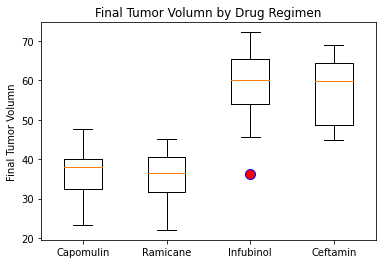

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_final=dict(marker='o', markerfacecolor='r',markersize=10,markeredgecolor='blue')

plt.boxplot(tumor_final, flierprops=boxplot_final)

plt.title('Final Tumor Volumn by Drug Regimen')

plt.xticks([1,2,3,4],['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel('Final Tumor Volumn')

plt.show()

## Line and Scatter Plots

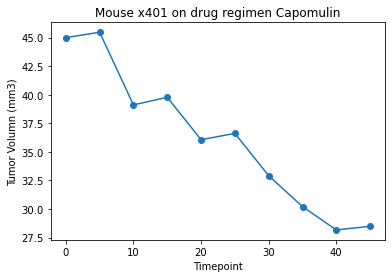

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse=data_final.loc[data_final['Mouse ID']=='x401']

plt.plot(mouse['Timepoint'],mouse['Tumor Volume (mm3)'],marker='o')

plt.xlabel ("Timepoint")
plt.ylabel("Tumor Volumn (mm3)")
plt.title("Mouse x401 on drug regimen Capomulin")
plt.show()

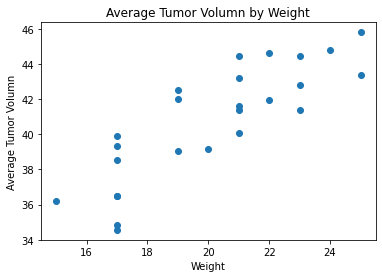

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capolumin=data_final.loc[data_final['Drug Regimen']=="Capomulin"]

avg_tumor=capolumin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_tumor_df=pd.DataFrame(avg_tumor.reset_index().rename(columns={'Tumor Volume (mm3)':'Avg Tumor Vol'}))

avg_tumor_weight=pd.merge(capolumin,avg_tumor_df, on="Mouse ID")
avg_tumor_weight

avg_tumor_weight_final=avg_tumor_weight[['Weight (g)','Avg Tumor Vol']].drop_duplicates()
avg_tumor_weight_final

x=avg_tumor_weight_final['Weight (g)']
y=avg_tumor_weight_final['Avg Tumor Vol']

plt.scatter(x,y)

plt.xlabel("Weight")
plt.ylabel('Average Tumor Volumn')
plt.title('Average Tumor Volumn by Weight')

plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


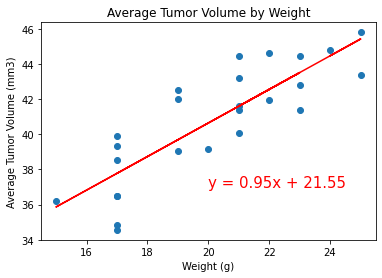

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capolumin=data_final.loc[data_final['Drug Regimen']=="Capomulin"]

avg_tumor=capolumin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_tumor_df=pd.DataFrame(avg_tumor.reset_index().rename(columns={'Tumor Volume (mm3)':'Avg Tumor Vol'}))

avg_tumor_weight=pd.merge(capolumin,avg_tumor_df, on="Mouse ID")
avg_tumor_weight

avg_tumor_weight_final=avg_tumor_weight[['Weight (g)','Avg Tumor Vol']].drop_duplicates()
avg_tumor_weight_final

x=avg_tumor_weight_final['Weight (g)']
y=avg_tumor_weight_final['Avg Tumor Vol']

correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()